In [ ]:
!pip install keras_core

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 6.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import os
import time
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

os.environ["KERAS_BACKEND"] = "torch"
import keras_core as keras

# The Perceptron and beyond

In this section, we consider a regression task where the underlying data generation process is as follows:
$$ y = - \sin{(0.8 * x)}$$

Note that in this example there is no noise in the data, a case that you will rarely encounter in practice.

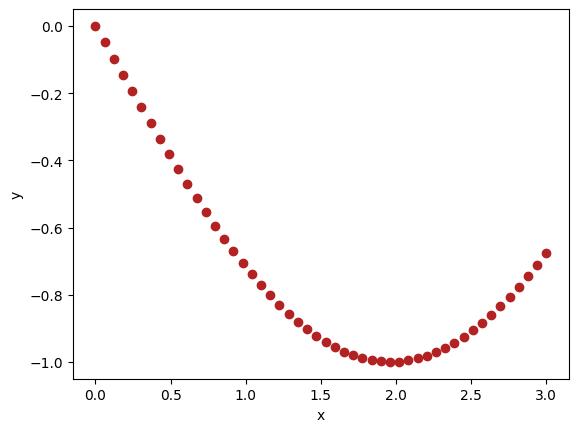

In [ ]:
# Defining our dataset

x_train = np.linspace(0, 3, 50)
y_train = - np.sin(0.8*x_train)

# Plotting the dataset

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color= "firebrick")
plt.show()

The following function can be used to instantiate the perceptron

In [ ]:
def perceptron(input_shape= [1], units= 1, activation= None):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation)
        ]
    )
    return model

linear_model = perceptron()

# You can vizualize a summary of your model by commenting out the following line.
# Here it is an affine function in dimension 1, thus having two parameters.

linear_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense_1 (Dense)                    │ (None, 1)                     │           2 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

To fit a model in keras, one must first compile it, that is specify the loss and optimizer. Here they are respectively chosen as the mean squared error and gradient descent. Observe that the batch size is the same as the size of the training dataset, resulting in batch gradient descent.

You can play with the learning rate and number of epochs to understand how the training algorithm behaves.

Epoch 1/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.9622
Epoch 2/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3428
Epoch 3/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1611
Epoch 4/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1038
Epoch 5/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0824
Epoch 6/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0720
Epoch 7/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0654
Epoch 8/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0605
Epoch 9/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0564
Epoch 10/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0531
Epoch 11/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0503
Epoch 12/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0479
Epoch 13/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0459
Epoch 14/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0442
Epoch 15/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0428
Epoch 16/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

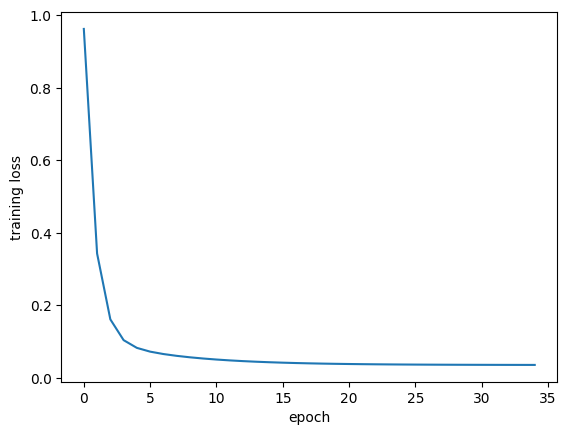

In [ ]:
linear_model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.SGD(learning_rate= 0.2)
)
history = linear_model.fit(x_train, y_train, epochs= 35, batch_size= 50)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'])
plt.show()

Epoch 1/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0893
Epoch 2/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0803
Epoch 3/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0738
Epoch 4/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0690
Epoch 5/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0654
Epoch 6/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0628
Epoch 7/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0608
Epoch 8/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0593
Epoch 9/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0581
Epoch 10/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0571
Epoch 11/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0564
Epoch 12/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0557
Epoch 13/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0552
Epoch 14/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0547
Epoch 15/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0543
Epoch 16/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

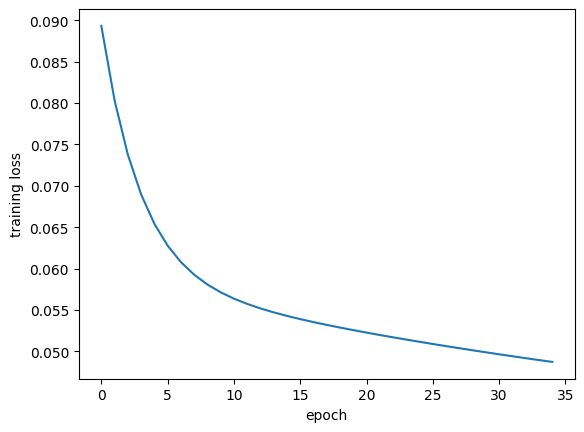

In [ ]:
linear_model = perceptron()

linear_model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.SGD(learning_rate= 0.2/10)
)
history = linear_model.fit(x_train, y_train, epochs= 35, batch_size= 50)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'])
plt.show()

Epoch 1/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.0757
Epoch 2/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.7720
Epoch 3/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.4775
Epoch 4/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1919
Epoch 5/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9151
Epoch 6/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.6466
Epoch 7/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3863
Epoch 8/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.1338
Epoch 9/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.8891
Epoch 10/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6518
Epoch 11/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.4217
Epoch 12/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1985
Epoch 13/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.9822
Epoch 14/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.7724
Epoch 15/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.5690
Epoch 16/35
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

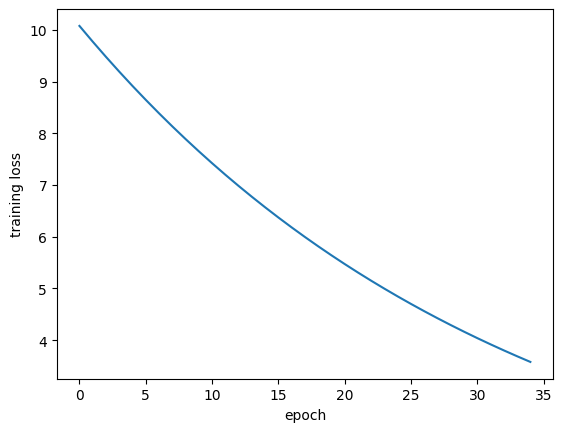

In [ ]:
linear_model = perceptron()

linear_model.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.SGD(learning_rate= 0.2/100)
)
history = linear_model.fit(x_train, y_train, epochs= 35, batch_size= 50)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(history.history['loss'])
plt.show()

Having trained the model, we can now use it in prediction.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


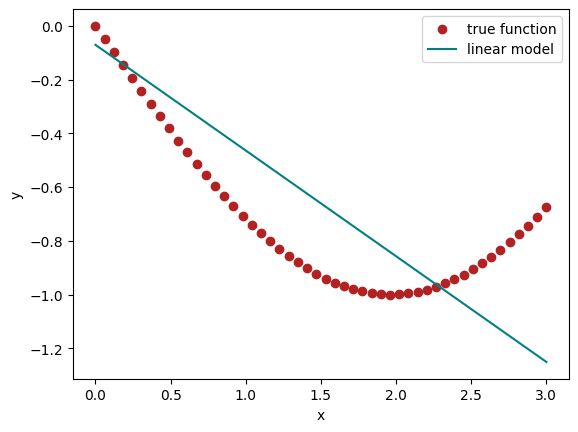

In [ ]:
y_pred_linear = linear_model.predict(x_train)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color='firebrick', label= 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label= 'linear model')
plt.legend()
plt.show()

Beyond this simple perceptron, we now consider a 2-layers neural network model.

In [ ]:
def neural_net_2layers(input_shape= [1], units= 16, activation= 'sigmoid'):
    model = keras.Sequential(
        [
            keras.layers.Input(shape= input_shape),
            keras.layers.Dense(units= units, activation= activation),
            keras.layers.Dense(units= 1)
        ]
    )
    return model

You can train the model, and play with the hyperparameters to answer the questions.

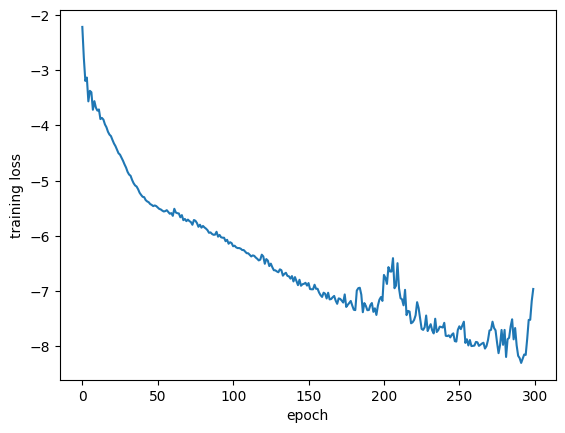

In [ ]:
net = neural_net_2layers(units= 10)

net.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.05)  # Try also the (batch) SGD optimizer
)

history = net.fit(x_train, y_train, epochs= 300, batch_size= 25, verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(np.log(history.history['loss']))
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


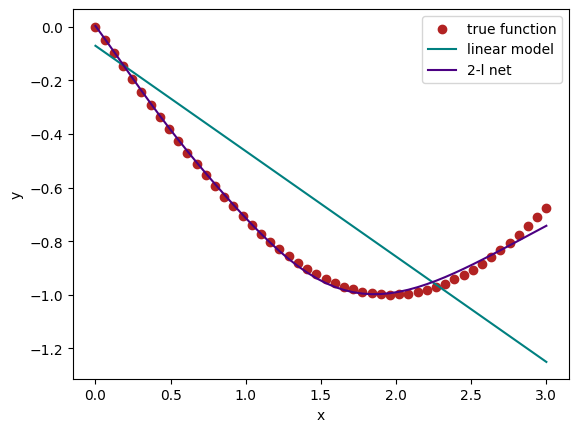

In [ ]:
y_pred_2l = net.predict(x_train)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x_train, y_train, color='firebrick', label = 'true function')
plt.plot(x_train, y_pred_linear, color= 'teal', label = 'linear model')
plt.plot(x_train, y_pred_2l, color= 'indigo', label = '2-l net')
plt.legend()
plt.show()

# In the wild jungle of training algorithms

## Small model

We first start by defining a simple dataset based on a modified cosine surface. This will allows us to test small models, and in particular 2nd order optimization algorithms. While <tt>keras</tt> is high-level deep learning library, we will dive into the depths of <tt>pytorch</tt> to have more control over the optimization schemes.

The following class encodes the architecture of a neural network with two hidden layers, for when the input data is 2-dimensional. We provide a simplified <tt>fit</tt> method to train the neural network. You are encouraged to understand the code, and what executing the functions will return so as to draw legitimate conclusions about the experiments.

In [ ]:
class Net3L(nn.Module):

    def __init__(self, n_neurons_l1= 10, n_neurons_l2= 10):
        super(Net3L, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2, n_neurons_l1),
            nn.ReLU(),
            nn.Linear(n_neurons_l1, n_neurons_l2),
            nn.ReLU(),
            nn.Linear(n_neurons_l2, 1)
        )

    def forward(self, x):
        return self.linear_relu_stack(x)

    def fit(self, x_train, y_train, optimizer, batch_size, n_epochs_max):
        # Instantiate the train loader
        train_data = TensorDataset(x_train, y_train)
        train_loader = DataLoader(dataset =train_data, batch_size= batch_size, shuffle= True)
        # Beginning the optimization algorithm
        loss_list = []
        for n_epochs in range(n_epochs_max):
            # We train for a fixed number of epochs
            for x_batch, y_batch in train_loader:
                def closure():
                    optimizer.zero_grad()
                    output = self.forward(x_batch)
                    loss = nn.MSELoss()(output.squeeze(-1), y_batch)
                    loss.backward()
                    return loss
                loss = optimizer.step(closure)
            loss_list.append(loss.item())
        return loss_list

    def evaluate(self, x_test, y_test):
      y_pred = self(x_test).squeeze(-1)
      return (nn.MSELoss()(y_pred, y_test)).item()

The cell below gives an example of what happens when the training is done using the L-BFGS algorithm. It can be adapted to other algorithms by modifying the arguments passed to the <tt>fit</tt> method.

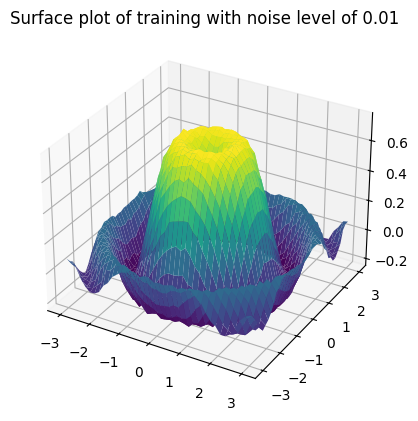

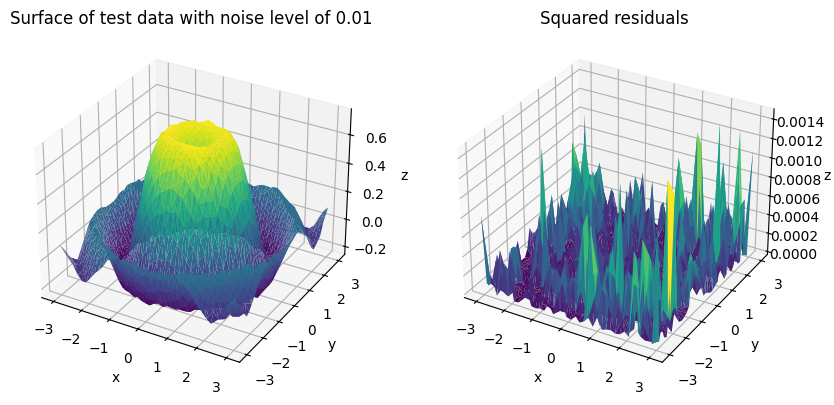

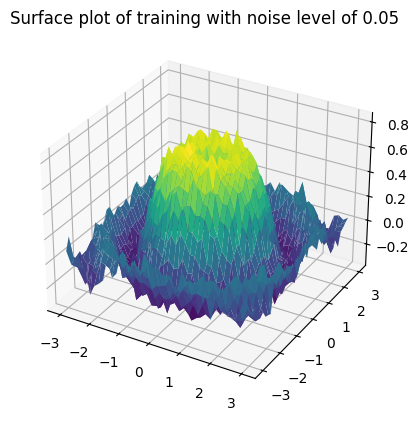

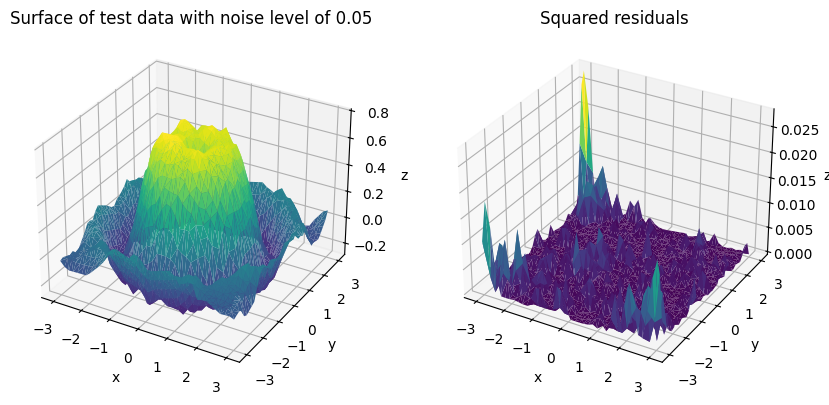

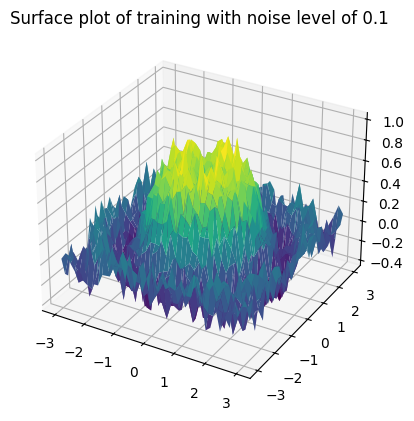

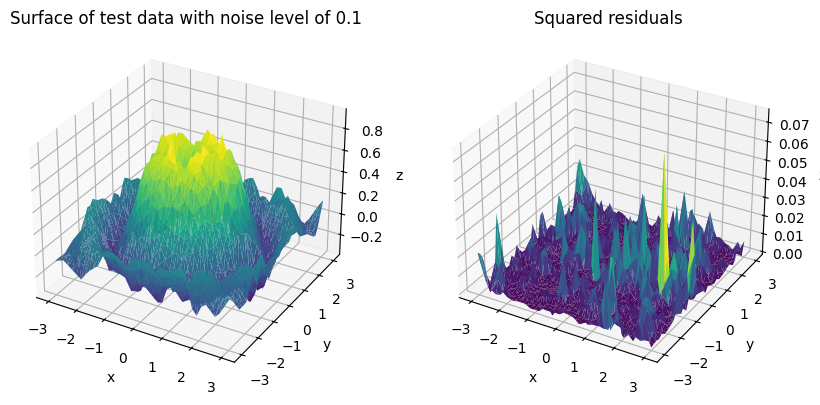

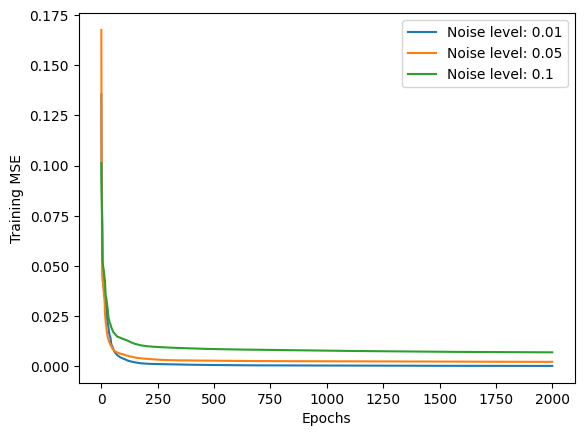

In [ ]:
def f(x, y):
    return(torch.sin(0.8*(x**2 + y**2)) / (x**2 + y**2)**(0.9))

noise_levels = [0.01, 0.05, 0.1]
mesh_size = 40
t = torch.linspace(-3, 3, mesh_size)
x, y = torch.meshgrid(t, t)
z = f(x, y)
loss_lists = []
eval_lists_train = []
eval_lists_test = []

for noise_level in noise_levels:
  z_noisy = z + noise_level * torch.randn(mesh_size, mesh_size)
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.plot_surface(x, y, z_noisy,cmap='viridis', edgecolor='none')
  ax.set_title(f'Surface plot of training with noise level of {noise_level}')
  plt.show()
  # dataset creation
  x_train = torch.vstack([x.ravel(), y.ravel()]).T
  y_train = z_noisy.ravel()
  y_test = z.ravel()
  #training
  net = Net3L(50, 50)
  loss_list = net.fit(x_train, y_train, torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'), 1600, 2000)
  loss_lists.append(loss_list)

  y_pred = net(x_train).detach().squeeze(-1)

  fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})
  #
  ax[0].plot_trisurf(x_train[:, 0], x_train[:, 1], y_pred, vmin=y_train.min(), cmap=cm.viridis)
  ax[0].set_xlabel('x')
  ax[0].set_ylabel('y')
  ax[0].set_zlabel('z')
  ax[0].set_title(f'Surface of test data with noise level of {noise_level}')
  #
  ax[1].plot_trisurf(x_train[:, 0], x_train[:, 1], (y_pred - y_test)**2, vmin=0, cmap=cm.viridis)
  ax[1].set_xlabel('x')
  ax[1].set_ylabel('y')
  ax[1].set_zlabel('z')
  ax[1].set_title('Squared residuals')
  plt.show()

  eval_lists_train.append(net.evaluate(x_train, y_train))
  eval_lists_test.append(net.evaluate(x_train, y_test))

# Plot the loss for different noise levels
plt.figure()
for i, noise_level in enumerate(noise_levels):
    plt.plot(loss_lists[i], label=f'Noise level: {noise_level}')
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
plt.legend()
plt.show()

In [ ]:
# Print evaluation errors for different noise levels
for i, noise_level in enumerate(noise_levels):
    print(f"Noise level {noise_level} - Training error: {eval_lists_train[i]:1.3e}")
    print(f"Noise level {noise_level} - Training error: {eval_lists_test[i]:1.3e}")

Noise level 0.01 - Training error: 1.327e-04
Noise level 0.01 - Training error: 9.691e-05
Noise level 0.025 - Training error: 5.507e-04
Noise level 0.025 - Training error: 3.376e-04
Noise level 0.05 - Training error: 1.702e-03
Noise level 0.05 - Training error: 7.406e-04
Noise level 0.1 - Training error: 7.043e-03
Noise level 0.1 - Training error: 3.145e-03


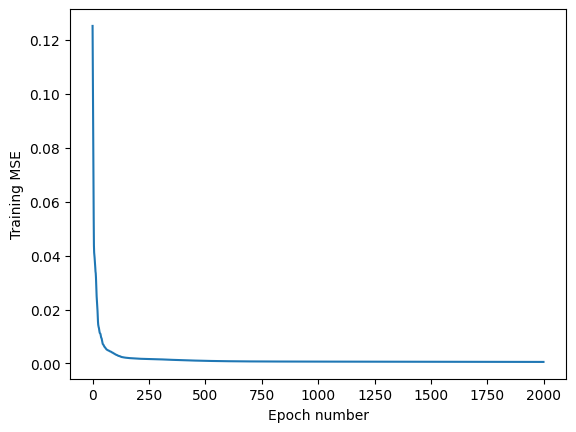

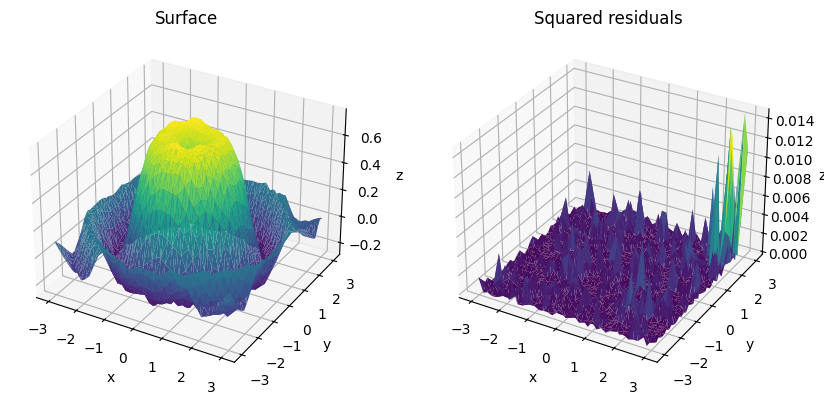

Training error: 0.0005815250333398581
Test error: 0.00036666245432570577


In [ ]:
net = Net3L(50, 50)
loss_list = net.fit(x_train, y_train, torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'), 1600, 2000)

plt.figure()
plt.xlabel('Epoch number')
plt.ylabel('Training MSE')
plt.plot(loss_list)
plt.show()

y_pred = net(x_train).detach().squeeze(-1)

fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})
#
ax[0].plot_trisurf(x_train[:, 0], x_train[:, 1], y_pred, vmin=y_train.min(), cmap=cm.viridis)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('z')
ax[0].set_title('Surface of prediction')
#
ax[1].plot_trisurf(x_train[:, 0], x_train[:, 1], (y_pred-y_train)**2, vmin=0, cmap=cm.viridis)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('z')
ax[1].set_title('Squared residuals')
plt.show()

print('Training error:', net.evaluate(x_train, y_train))
print('Test error:', net.evaluate(x_train, y_test))

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


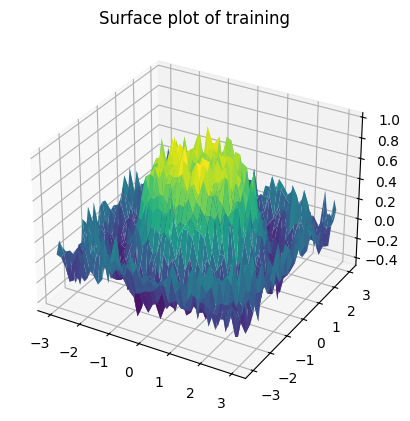

In [ ]:
def f(x, y):
    return(torch.sin(0.8*(x**2 + y**2)) / (x**2 + y**2)**(0.9))

noise_level = 0.1
mesh_size = 40
t = torch.linspace(-3, 3, mesh_size)
x, y = torch.meshgrid(t, t)
z = f(x, y)
z_noisy = z + noise_level * torch.randn(mesh_size, mesh_size)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z_noisy,cmap='viridis', edgecolor='none')
ax.set_title('Surface plot of training')
plt.show()


# dataset creation
x_train = torch.vstack([x.ravel(), y.ravel()]).T
y_train = z_noisy.ravel()
y_test = z.ravel()

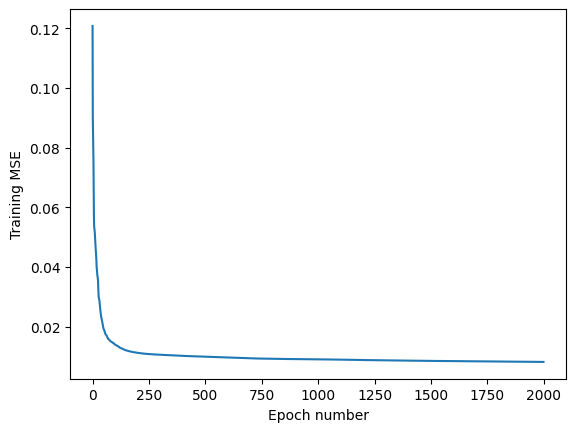

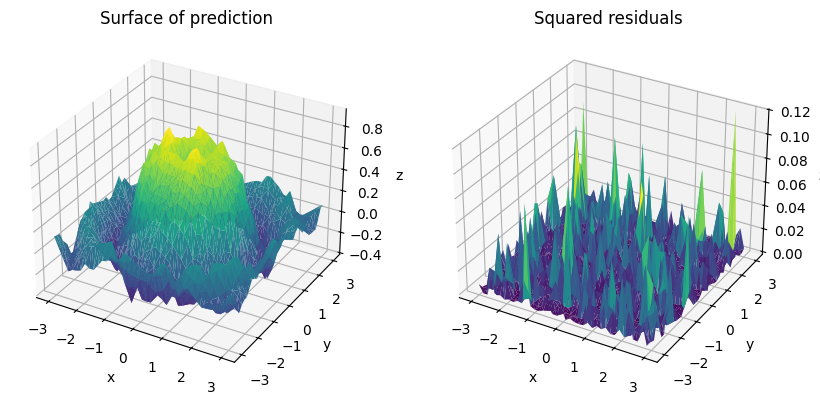

Training error: 0.00816580094397068
Test error: 0.003328110324218869


In [ ]:
net = Net3L(50, 50)
loss_list = net.fit(x_train, y_train, torch.optim.LBFGS(net.parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe'), 1600, 2000)

plt.figure()
plt.xlabel('Epoch number')
plt.ylabel('Training MSE')
plt.plot(loss_list)
plt.show()

y_pred = net(x_train).detach().squeeze(-1)

fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})
#
ax[0].plot_trisurf(x_train[:, 0], x_train[:, 1], y_pred, vmin=y_train.min(), cmap=cm.viridis)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('z')
ax[0].set_title('Surface of prediction')
#
ax[1].plot_trisurf(x_train[:, 0], x_train[:, 1], (y_pred-y_train)**2, vmin=0, cmap=cm.viridis)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('z')
ax[1].set_title('Squared residuals')
plt.show()

print('Training error:', net.evaluate(x_train, y_train))
print('Test error:', net.evaluate(x_train, y_test))

In [ ]:
# Example with a list of optimizers (running this cell takes ~5min with the default parameters)
net = Net3L(50, 50)
# We create copies of this net so that every optimizer starts with the same initialization.
net_list = [copy.deepcopy(net) for i in range(5)]
# The number of epochs and other hyperparameters can (and should) be adapted to the point you're trying to make.
n_epochs = 2500
optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
optim4 = torch.optim.Adam(params=net_list[3].parameters())
optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

optimizer_list = [optim1, optim2, optim3, optim4, optim5]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []
eval_list = []

for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)
    eval_list.append(net_list[i].evaluate(x_train, y_test))


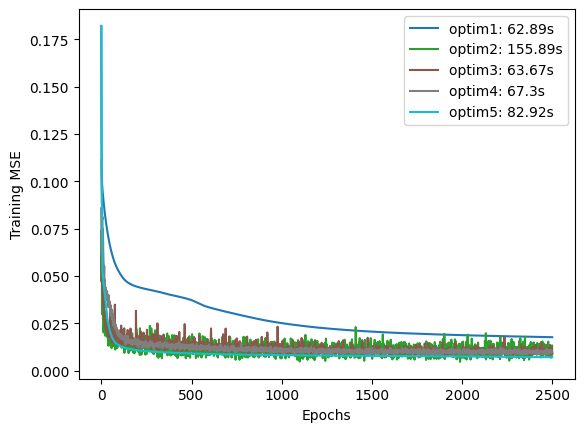

Training times: ['optim1: 62.89s', 'optim2: 155.89s', 'optim3: 63.67s', 'optim4: 67.30s', 'optim5: 82.92s']
Evaluation performances: ['optim1: 8.015e-03', 'optim2: 2.090e-03', 'optim3: 1.761e-03', 'optim4: 2.399e-03', 'optim5: 3.272e-03']


In [ ]:
colors = cm.tab10(torch.linspace(0, 1, 5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
for i in range(5):
    plt.plot(loss_meta_list[i], color= colors[i])
plt.legend([f"optim{i+1}: {round(times_list[i], 2)}s" for i in range(5)])
plt.show()
print('Training times:', [f"optim{i+1}: {times_list[i]:.2f}s" for i in range(5)])
print('Evaluation performances:', [f"optim{i+1}: {eval_list[i]:1.3e}" for i in range(5)])

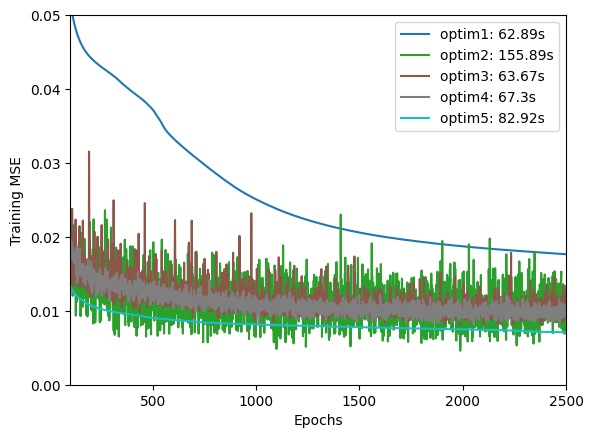

Training times: ['optim1: 62.89s', 'optim2: 155.89s', 'optim3: 63.67s', 'optim4: 67.30s', 'optim5: 82.92s']
Evaluation performances: ['optim1: 8.015e-03', 'optim2: 2.090e-03', 'optim3: 1.761e-03', 'optim4: 2.399e-03', 'optim5: 3.272e-03']


In [ ]:
colors = cm.tab10(torch.linspace(0, 1, 5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
for i in range(5):
    plt.plot(loss_meta_list[i], color= colors[i])
plt.legend([f"optim{i+1}: {round(times_list[i], 2)}s" for i in range(5)])
plt.axis([100, 2500, 0, 0.05])  # [xmin, xmax, ymin, ymax]
plt.show()
print('Training times:', [f"optim{i+1}: {times_list[i]:.2f}s" for i in range(5)])
print('Evaluation performances:', [f"optim{i+1}: {eval_list[i]:1.3e}" for i in range(5)])

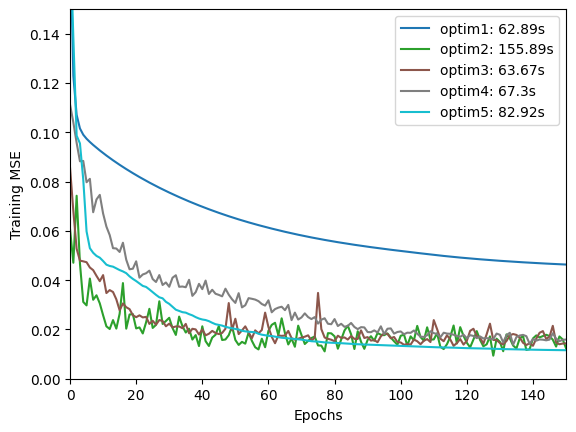

Training times: ['optim1: 62.89s', 'optim2: 155.89s', 'optim3: 63.67s', 'optim4: 67.30s', 'optim5: 82.92s']
Evaluation performances: ['optim1: 8.015e-03', 'optim2: 2.090e-03', 'optim3: 1.761e-03', 'optim4: 2.399e-03', 'optim5: 3.272e-03']


In [ ]:
colors = cm.tab10(torch.linspace(0, 1, 5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
for i in range(5):
    plt.plot(loss_meta_list[i], color= colors[i])
plt.legend([f"optim{i+1}: {round(times_list[i], 2)}s" for i in range(5)])
plt.axis([0, 150, 0, 0.15])  # [xmin, xmax, ymin, ymax]
plt.show()
print('Training times:', [f"optim{i+1}: {times_list[i]:.2f}s" for i in range(5)])
print('Evaluation performances:', [f"optim{i+1}: {eval_list[i]:1.3e}" for i in range(5)])

In [ ]:
# Example with a list of optimizers (running this cell takes ~5min with the default parameters)
net = Net3L(50, 50)
# We create copies of this net so that every optimizer starts with the same initialization.
net_list = [copy.deepcopy(net) for i in range(5)]
# The number of epochs and other hyperparameters can (and should) be adapted to the point you're trying to make.
n_epochs = 200
optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
optim4 = torch.optim.Adam(params=net_list[3].parameters())
optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

optimizer_list = [optim1, optim2, optim3, optim4, optim5]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []
eval_list = []

for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)
    eval_list.append(net_list[i].evaluate(x_train, y_test))


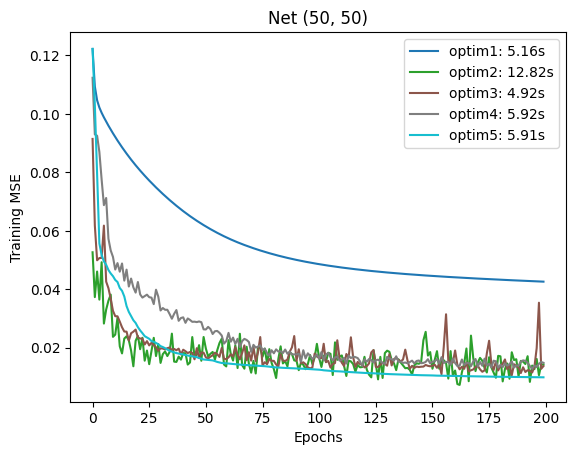

Training times: ['optim1: 5.16s', 'optim2: 12.82s', 'optim3: 4.92s', 'optim4: 5.92s', 'optim5: 5.91s']
Evaluation performances: ['optim1: 3.248e-02', 'optim2: 4.477e-03', 'optim3: 4.187e-03', 'optim4: 4.848e-03', 'optim5: 2.042e-03']


In [ ]:
colors = cm.tab10(torch.linspace(0, 1, 5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
plt.title('Net (50, 50)')  # <-- Add title here
for i in range(5):
    plt.plot(loss_meta_list[i], color= colors[i])
plt.legend([f"optim{i+1}: {round(times_list[i], 2)}s" for i in range(5)])
plt.show()
print('Training times:', [f"optim{i+1}: {times_list[i]:.2f}s" for i in range(5)])
print('Evaluation performances:', [f"optim{i+1}: {eval_list[i]:1.3e}" for i in range(5)])

In [ ]:
# Example with a list of optimizers (running this cell takes ~5min with the default parameters)
net = Net3L(10, 10)
# We create copies of this net so that every optimizer starts with the same initialization.
net_list = [copy.deepcopy(net) for i in range(5)]
# The number of epochs and other hyperparameters can (and should) be adapted to the point you're trying to make.
n_epochs = 200
optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
optim4 = torch.optim.Adam(params=net_list[3].parameters())
optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

optimizer_list = [optim1, optim2, optim3, optim4, optim5]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []
eval_list = []

for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)
    eval_list.append(net_list[i].evaluate(x_train, y_test))


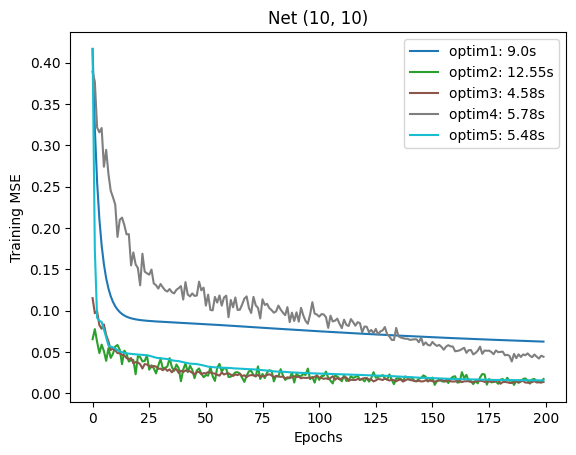

Training times: ['optim1: 9.00s', 'optim2: 12.55s', 'optim3: 4.58s', 'optim4: 5.78s', 'optim5: 5.48s']
Evaluation performances: ['optim1: 5.070e-02', 'optim2: 6.772e-03', 'optim3: 3.759e-03', 'optim4: 3.430e-02', 'optim5: 6.337e-03']


In [ ]:
colors = cm.tab10(torch.linspace(0, 1, 5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
plt.title('Net (10, 10)')  # <-- Add title here
for i in range(5):
    plt.plot(loss_meta_list[i], color= colors[i])
plt.legend([f"optim{i+1}: {round(times_list[i], 2)}s" for i in range(5)])
plt.show()
print('Training times:', [f"optim{i+1}: {times_list[i]:.2f}s" for i in range(5)])
print('Evaluation performances:', [f"optim{i+1}: {eval_list[i]:1.3e}" for i in range(5)])

In [ ]:
# Example with a list of optimizers (running this cell takes ~5min with the default parameters)
net = Net3L(100, 100)
# We create copies of this net so that every optimizer starts with the same initialization.
net_list = [copy.deepcopy(net) for i in range(5)]
# The number of epochs and other hyperparameters can (and should) be adapted to the point you're trying to make.
n_epochs = 200
optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
optim4 = torch.optim.Adam(params=net_list[3].parameters())
optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

optimizer_list = [optim1, optim2, optim3, optim4, optim5]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []
eval_list = []

for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)
    eval_list.append(net_list[i].evaluate(x_train, y_test))


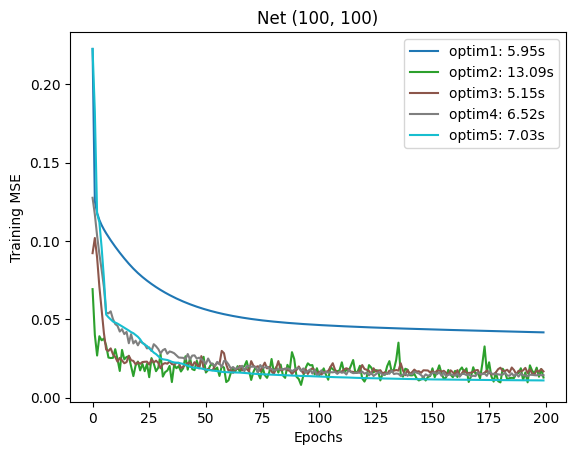

Training times: ['optim1: 5.95s', 'optim2: 13.09s', 'optim3: 5.15s', 'optim4: 6.52s', 'optim5: 7.03s']
Evaluation performances: ['optim1: 2.955e-02', 'optim2: 4.164e-03', 'optim3: 5.430e-03', 'optim4: 5.064e-03', 'optim5: 2.027e-03']


In [ ]:
colors = cm.tab10(torch.linspace(0, 1, 5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
plt.title('Net (100, 100)')  # <-- Add title here
for i in range(5):
    plt.plot(loss_meta_list[i], color= colors[i])
plt.legend([f"optim{i+1}: {round(times_list[i], 2)}s" for i in range(5)])
plt.show()
print('Training times:', [f"optim{i+1}: {times_list[i]:.2f}s" for i in range(5)])
print('Evaluation performances:', [f"optim{i+1}: {eval_list[i]:1.3e}" for i in range(5)])

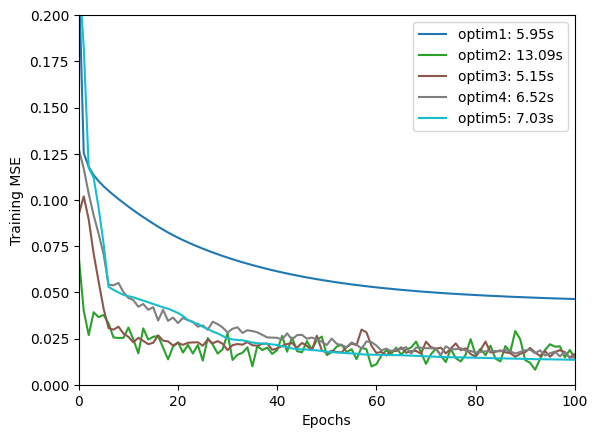

Training times: ['optim1: 5.95s', 'optim2: 13.09s', 'optim3: 5.15s', 'optim4: 6.52s', 'optim5: 7.03s']
Evaluation performances: ['optim1: 2.955e-02', 'optim2: 4.164e-03', 'optim3: 5.430e-03', 'optim4: 5.064e-03', 'optim5: 2.027e-03']


In [ ]:
colors = cm.tab10(torch.linspace(0, 1, 5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
for i in range(5):
    plt.plot(loss_meta_list[i], color= colors[i])
plt.legend([f"optim{i+1}: {round(times_list[i], 2)}s" for i in range(5)])
plt.axis([0, 100, 0, 0.2])  # [xmin, xmax, ymin, ymax]
plt.show()
print('Training times:', [f"optim{i+1}: {times_list[i]:.2f}s" for i in range(5)])
print('Evaluation performances:', [f"optim{i+1}: {eval_list[i]:1.3e}" for i in range(5)])

In [ ]:
# Example with a list of optimizers (running this cell takes ~5min with the default parameters)
net = Net3L(500, 500)
# We create copies of this net so that every optimizer starts with the same initialization.
net_list = [copy.deepcopy(net) for i in range(5)]
# The number of epochs and other hyperparameters can (and should) be adapted to the point you're trying to make.
n_epochs = 200
optim1 = torch.optim.SGD(params=net_list[0].parameters(), lr=0.05)
optim2 = torch.optim.SGD(params=net_list[1].parameters(), lr=0.1)
optim3 = torch.optim.SGD(params=net_list[2].parameters(), lr=0.1, momentum=0.9, nesterov= True)
optim4 = torch.optim.Adam(params=net_list[3].parameters())
optim5 = torch.optim.LBFGS(params=net_list[4].parameters(), lr=1, max_iter=1, line_search_fn='strong_wolfe')

optimizer_list = [optim1, optim2, optim3, optim4, optim5]
batch_sizes_list = [1600, 40, 400, 400, 1600]
times_list = []
loss_meta_list = []
eval_list = []

for i, optimizer in enumerate(optimizer_list):
    t0 = time.time()
    loss_list = net_list[i].fit(x_train, y_train, optimizer= optimizer, batch_size= batch_sizes_list[i], n_epochs_max= n_epochs)
    t1 = time.time()
    times_list.append(t1-t0)
    loss_meta_list.append(loss_list)
    eval_list.append(net_list[i].evaluate(x_train, y_test))


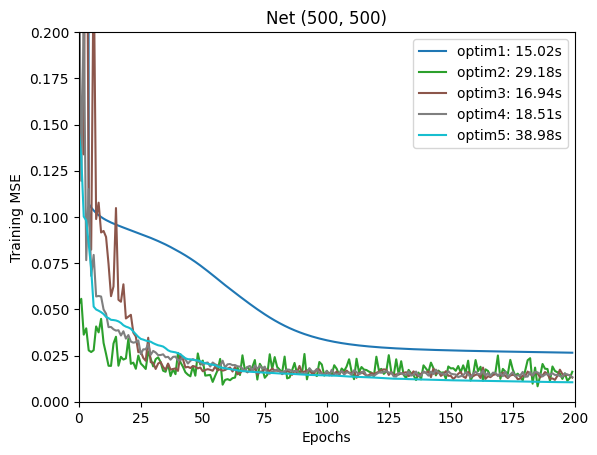

Training times: ['optim1: 15.02s', 'optim2: 29.18s', 'optim3: 16.94s', 'optim4: 18.51s', 'optim5: 38.98s']
Evaluation performances: ['optim1: 1.516e-02', 'optim2: 5.008e-03', 'optim3: 3.501e-03', 'optim4: 5.045e-03', 'optim5: 2.185e-03']


In [ ]:
colors = cm.tab10(torch.linspace(0, 1, 5))
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training MSE')
plt.title('Net (500, 500)')  # <-- Add title here
for i in range(5):
    plt.plot(loss_meta_list[i], color= colors[i])
plt.legend([f"optim{i+1}: {round(times_list[i], 2)}s" for i in range(5)])
plt.axis([0, 200, 0, 0.2])  # [xmin, xmax, ymin, ymax]
plt.show()
print('Training times:', [f"optim{i+1}: {times_list[i]:.2f}s" for i in range(5)])
print('Evaluation performances:', [f"optim{i+1}: {eval_list[i]:1.3e}" for i in range(5)])

## Towards a bigger model

We now switch to a bigger model, used to perform classification over the MNIST dataset. This example is widely known in the machine learning community, and we follow the code in the footsteps of François Chollet, the creator of the <tt>keras</tt> library (https://keras.io/examples/vision/mnist_convnet/).

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)        │        320 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)        │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)        │     18,496 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)          │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten (Flatten)               │ (None, 1600)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout (Dropout)               │ (None, 1600)              │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense (Dense)                   │ (None, 10)                │     16,010 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

The following cell deals with the training of the model. Can you change the optimizer while still retaining the capabilities of the model trained with adam ?

In [ ]:
batch_size = 128
epochs = 15

In [ ]:
# Modify the optimizer here
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 89ms/step - accuracy: 0.7713 - loss: 0.7333 - val_accuracy: 0.9773 - val_loss: 0.0815
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 81ms/step - accuracy: 0.9621 - loss: 0.1244 - val_accuracy: 0.9847 - val_loss: 0.0584
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 82ms/step - accuracy: 0.9728 - loss: 0.0891 - val_accuracy: 0.9867 - val_loss: 0.0463
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 84ms/step - accuracy: 0.9767 - loss: 0.0750 - val_accuracy: 0.9872 - val_loss: 0.0442
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - accuracy: 0.9800 - loss: 0.0654 - val_accuracy: 0.9897 - val_loss: 0.0384
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9821 - loss: 0.0586 - val_accuracy: 0.9900 - val_loss: 0.0364
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.9826 - loss: 0.0550 - val_accuracy: 0.9895 - val_loss: 0.0327
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 40s 94ms/step - accuracy: 0.9845 - loss: 0.0494 - 

In [ ]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                  │ (None, 26, 26, 32)            │         320 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_8 (MaxPooling2D)     │ (None, 13, 13, 32)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_9 (Conv2D)                  │ (None, 11, 11, 64)            │      18,496 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_9 (MaxPooling2D)     │ (None, 5, 5, 64)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_4 (Flatten)                │ (None, 1600)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_10 (Dropout)               │ (None, 1600)                  │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_179 (Dense)                  │ (None, 10)                    │      16,010 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 104,480 (408.12 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,654 (272.09 KB)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# After compiling the model with Adadelta optimizer
print("Adam default Learning Rate:", model.optimizer.learning_rate.numpy())

Adam default Learning Rate: 0.001


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.025279924273490906
Test accuracy: 0.9915000200271606


In [ ]:
#SGD from scrach with default lr of 0.01
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

# Modify the optimizer here
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.2916 - loss: 2.1059 - val_accuracy: 0.8770 - val_loss: 0.5939
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.7752 - loss: 0.7143 - val_accuracy: 0.9312 - val_loss: 0.2766
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 109ms/step - accuracy: 0.8727 - loss: 0.4199 - val_accuracy: 0.9483 - val_loss: 0.1997
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 116ms/step - accuracy: 0.9026 - loss: 0.3260 - val_accuracy: 0.9555 - val_loss: 0.1651
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 109ms/step - accuracy: 0.9187 - loss: 0.2706 - val_accuracy: 0.9628 - val_loss: 0.1436
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 105ms/step - accuracy: 0.9303 - loss: 0.2362 - val_accuracy: 0.9663 - val_loss: 0.1282
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 107ms/step - accuracy: 0.9343 - loss: 0.2151 - val_accuracy: 0.9678 - val_loss: 0.1183
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 104ms/step - accuracy: 0.9419 - loss: 0

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# After compiling the model with Adadelta optimizer
print("SGD default Learning Rate:", model.optimizer.learning_rate.numpy())

SGD Learning Rate: 0.01


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.08368907123804092
Test accuracy: 0.9746000170707703


In [ ]:
#SGD from scrach with lr of 0.001
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

# Modify the optimizer here
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.001), metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.1059 - loss: 2.3088 - val_accuracy: 0.1942 - val_loss: 2.2723
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 86ms/step - accuracy: 0.1605 - loss: 2.2677 - val_accuracy: 0.3370 - val_loss: 2.2270
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.2470 - loss: 2.2219 - val_accuracy: 0.5250 - val_loss: 2.1605
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.3450 - loss: 2.1504 - val_accuracy: 0.6512 - val_loss: 2.0431
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.4309 - loss: 2.0267 - val_accuracy: 0.7342 - val_loss: 1.8227
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.5058 - loss: 1.8097 - val_accuracy: 0.7762 - val_loss: 1.4694
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 88ms/step - accuracy: 0.5634 - loss: 1.5101 - val_accuracy: 0.8128 - val_loss: 1.0975
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.6233 - loss: 1.2345 - 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.4080273509025574
Test accuracy: 0.8967999815940857


In [ ]:
#SGD from scrach with lr of 0.1
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

# Modify the optimizer here
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 112ms/step - accuracy: 0.7367 - loss: 0.8140 - val_accuracy: 0.9628 - val_loss: 0.1213
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.9490 - loss: 0.1705 - val_accuracy: 0.9733 - val_loss: 0.0868
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 103ms/step - accuracy: 0.9618 - loss: 0.1251 - val_accuracy: 0.9815 - val_loss: 0.0661
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - accuracy: 0.9678 - loss: 0.1069 - val_accuracy: 0.9815 - val_loss: 0.0634
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 105ms/step - accuracy: 0.9683 - loss: 0.1024 - val_accuracy: 0.9840 - val_loss: 0.0552
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.9728 - loss: 0.0882 - val_accuracy: 0.9847 - val_loss: 0.0533
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9754 - loss: 0.0812 - val_accuracy: 0.9880 - val_loss: 0.0487
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - accuracy: 0.9779 - loss: 0

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03565474599599838
Test accuracy: 0.9879999756813049


In [ ]:
#adadelta from scratch with default lr of 0.001
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

# Modify the optimizer here
model.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 117ms/step - accuracy: 0.1055 - loss: 2.3060 - val_accuracy: 0.1423 - val_loss: 2.2866
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 114ms/step - accuracy: 0.1244 - loss: 2.2886 - val_accuracy: 0.1987 - val_loss: 2.2688
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 115ms/step - accuracy: 0.1442 - loss: 2.2719 - val_accuracy: 0.2590 - val_loss: 2.2510
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 114ms/step - accuracy: 0.1723 - loss: 2.2551 - val_accuracy: 0.3063 - val_loss: 2.2329
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 120ms/step - accuracy: 0.1922 - loss: 2.2370 - val_accuracy: 0.3533 - val_loss: 2.2143
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 116ms/step - accuracy: 0.2186 - loss: 2.2216 - val_accuracy: 0.3980 - val_loss: 2.1951
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 51s 120ms/step - accuracy: 0.2428 - loss: 2.2025 - val_accuracy: 0.4402 - val_loss: 2.1747
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 118ms/step - accuracy: 0.2748 - loss: 2

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=["accuracy"])

# After compiling the model with Adadelta optimizer
print("Adadelta default Learning Rate:", model.optimizer.learning_rate.numpy())

Adadelta Learning Rate: 0.001


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.9582111835479736
Test accuracy: 0.6966999769210815


In [ ]:
#adadelta from scratch with lr of 1
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

# Modify the optimizer here
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adadelta(learning_rate=1.0), metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - accuracy: 0.7856 - loss: 0.6702 - val_accuracy: 0.9790 - val_loss: 0.0781
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9634 - loss: 0.1198 - val_accuracy: 0.9855 - val_loss: 0.0581
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 97ms/step - accuracy: 0.9738 - loss: 0.0880 - val_accuracy: 0.9868 - val_loss: 0.0473
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 39s 92ms/step - accuracy: 0.9768 - loss: 0.0763 - val_accuracy: 0.9873 - val_loss: 0.0449
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 36s 85ms/step - accuracy: 0.9792 - loss: 0.0652 - val_accuracy: 0.9902 - val_loss: 0.0396
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 34s 82ms/step - accuracy: 0.9817 - loss: 0.0605 - val_accuracy: 0.9902 - val_loss: 0.0382
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.9840 - loss: 0.0516 - val_accuracy: 0.9907 - val_loss: 0.0357
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 35s 83ms/step - accuracy: 0.9830 - loss: 0.0540 - 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03031737729907036
Test accuracy: 0.9902999997138977


# A personal regression example


For this exercise, you will work on a dataset that is built from your personal student number as indicated in the assignment. If you have trouble with loading the data, place the data.csv file in your working directory.

In [ ]:
try:
  data = pd.read_csv("data.csv", header= None).values.T
  print("Succesfully loaded data")
except:
  try:
    data_url = "https://github.com/KULasagna/ANN_DL_public/blob/master/session1/data.csv?raw=true"
    data = pd.read_csv(data_url, header= None).values.T
    print("Succesfully loaded data")
  except:
    print(f"Please download the data.csv file from Toledo and place it in your working directory: {os.getcwd()}")

Succesfully loaded data


In [ ]:
def dataset_generation(d1, d2, d3, d4, d5):
    T_new = (d1 * data[:, 2] + d2 * data[:, 3] + d3 * data[:, 4] + d4 * data[:, 5] + d5 * data[:, 6])/(d1 + d2 + d3 + d4 + d5)
    return T_new

x_values = data[:, 0:2]

# Put your own (decreasingly ordered) student number in the function
# e.g. u1024659 --> T_new =  dataset_generation(9, 6, 5, 4, 2)

T_new =  dataset_generation(6, 6, 3, 2, 1)

# Random subsampling to get the working dataset
idx = np.random.permutation(13600)

# training set
x_train = x_values[idx[0:2000]]
y_train = T_new[idx[0:2000]]

# test set
x_test = x_values[idx[2000:3000]]
y_test = T_new[idx[2000:3000]]


print('Number of training datapoints:', x_train.shape[0])
print('Number of testing datapoints:', x_test.shape[0])

Number of training datapoints: 2000
Number of testing datapoints: 1000


You can now plot the surface of the dataset. (Hint: use the function <tt> plot_trisurf </tt>)

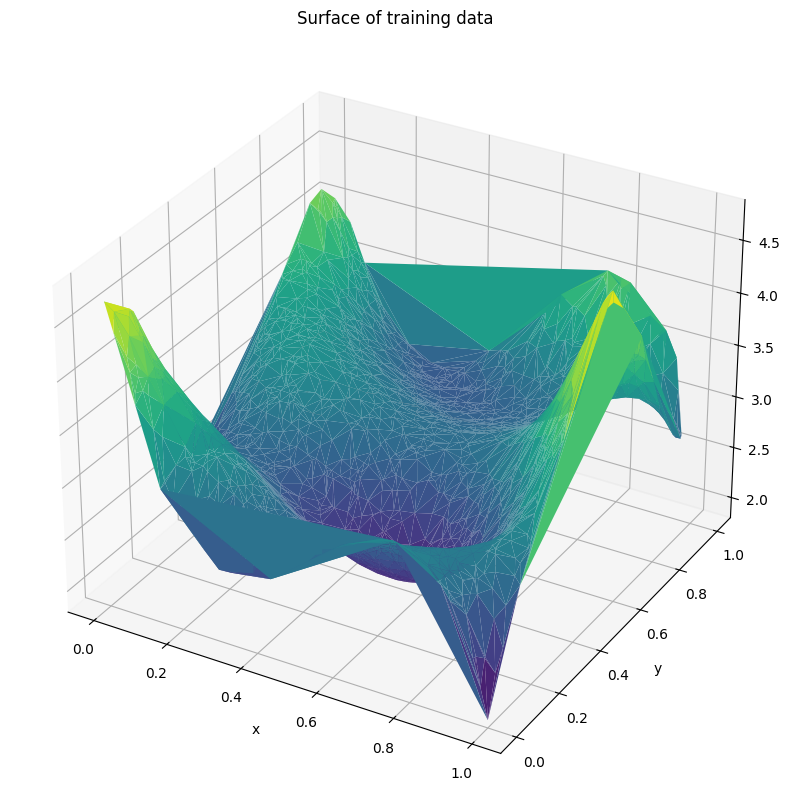

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})
# TODO

ax.plot_trisurf(x_train[:, 0], x_train[:, 1], y_train, vmin=y_train.min(), cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Surface of training data')

plt.show()


In the following, we give an example of how to train a model. When you train yours, do not forget to validate it ! Hint: it is not enough to look at the training error. The hyperparameter values have voluntarily be set to give suboptimal results, you can do better than the proposed architecture !

In [ ]:
net = keras.Sequential(
        [
            keras.layers.Input(shape= [x_train.shape[1]]),
            keras.layers.Dense(100, activation='relu'),
            keras.layers.Dense(100, activation='tanh'),
            keras.layers.Dense(100, activation='relu'),
            keras.layers.Dense(50, activation='relu'),
            keras.layers.Dense(50, activation='tanh'),
            keras.layers.Dense(50, activation='relu'),
            keras.layers.Dense(units= 1)
        ]
    )

net.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.01)
)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = net.fit(x_train, y_train, validation_split= 0.2, epochs= 200, batch_size= 50, callbacks= [callback], verbose= 1)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6215 - val_loss: 0.2292
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1949 - val_loss: 0.1782
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1605 - val_loss: 0.1359
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1341 - val_loss: 0.1623
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1225 - val_loss: 0.0983
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1003 - val_loss: 0.0923
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0973 - val_loss: 0.0952
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0872 - val_loss: 0.0875
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0853 - val_loss: 0.1158
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0886 - val_loss: 0.0880
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0830 - val_loss: 0.0716
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

<ipython-input-57-506b530a6987>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


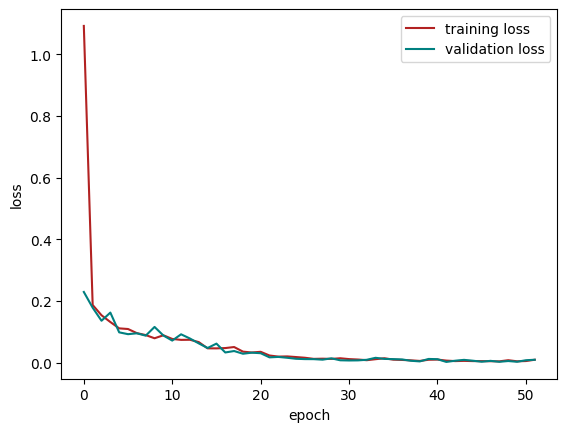

Last training error: 0.009484476409852505
Last validation error: 0.00942519772797823


In [ ]:
plt.figure()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.plot(history.history['loss'], color= "firebrick")
plt.plot(history.history['val_loss'], color= 'teal')
plt.legend(['training loss', 'validation loss'])
plt.show()

print('Last training error:', history.history['loss'][-1])
print('Last validation error:', history.history['val_loss'][-1])

Once a model is trained, you can use it to assess the final performance of the model on the test set.

In [ ]:
y_pred = net.predict(x_test).squeeze(-1)
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step        
Final test error: 0.004353067911400561


Text(0.5, 0.92, 'Surface of prediction of test set')

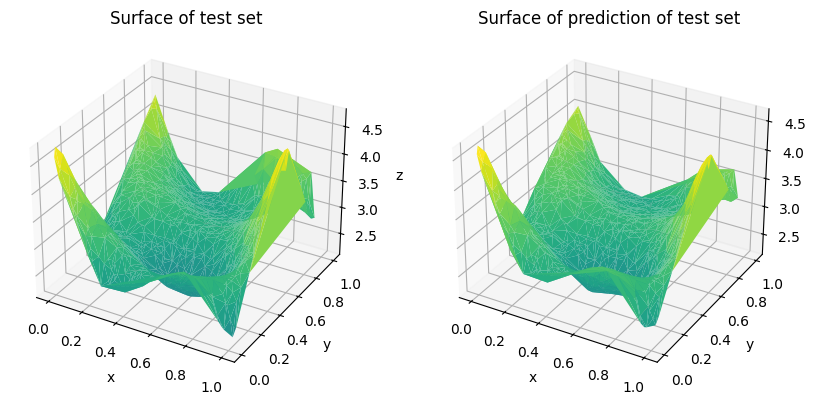

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})

#
ax[0].plot_trisurf(x_test[:, 0], x_test[:, 1], y_test, vmin=x_test.min(), cmap=cm.viridis)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('z')
ax[0].set_title('Surface of test set')
#
ax[1].plot_trisurf(x_test[:, 0], x_test[:, 1], y_pred, vmin=x_test.min(), cmap=cm.viridis)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('z')
ax[1].set_title('Surface of prediction of test set')

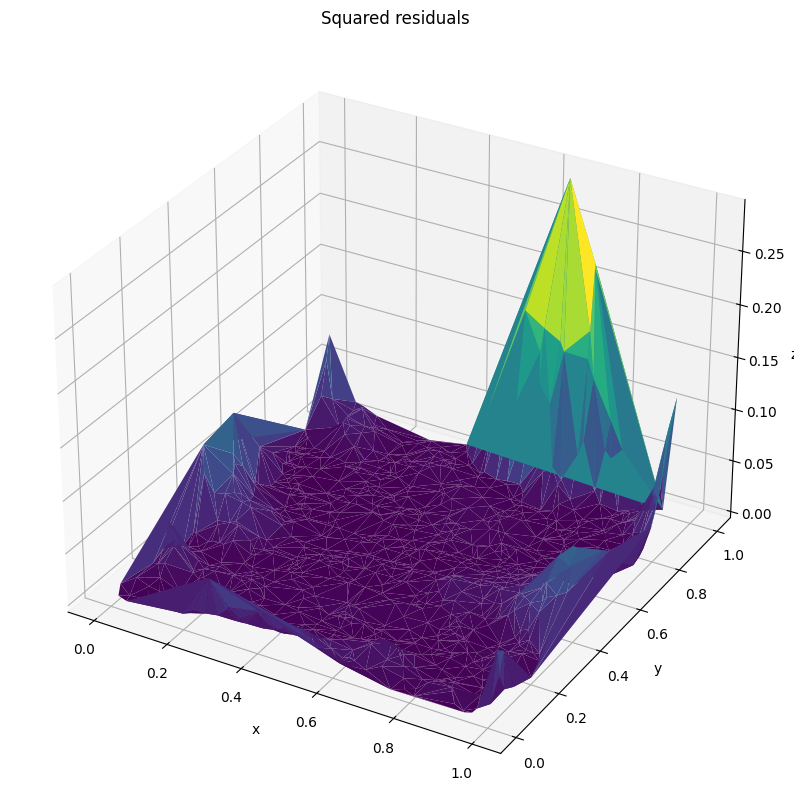

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})

ax.plot_trisurf(x_test[:, 0], x_test[:, 1], (y_pred-y_test)**2, vmin=0, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Squared residuals')
plt.show()


<ipython-input-61-5c4b9eccacc0>:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


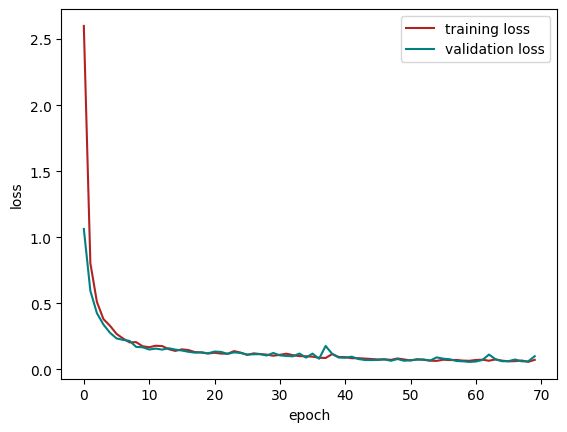

Last training error: 0.07274731248617172
Last validation error: 0.1003207340836525
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step        
Final test error: 0.03232774785652679


Text(0.5, 0.92, 'Surface of prediction of test set')

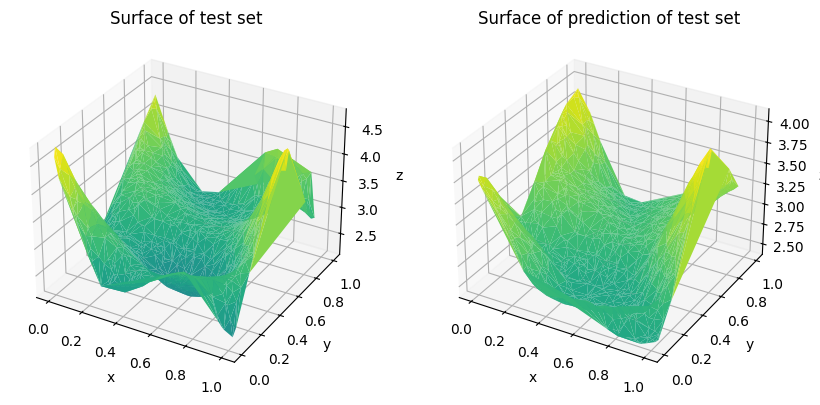

In [ ]:
net = keras.Sequential(
        [
            keras.layers.Input(shape= [x_train.shape[1]]),
            keras.layers.Dense(100, activation='relu'),
            keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l2(0.01), activation='tanh'),
            keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'),
            keras.layers.Dense(50, activation='relu'),
            keras.layers.Dense(50, kernel_regularizer=keras.regularizers.l2(0.01), activation='tanh'),
            keras.layers.Dense(50, kernel_regularizer=keras.regularizers.l2(0.01), activation='relu'),
            keras.layers.Dense(units= 1)
        ]
    )

net.compile(
    loss = keras.losses.MeanSquaredError(),
    optimizer = keras.optimizers.Adam(learning_rate= 0.01)
)

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = net.fit(x_train, y_train, validation_split= 0.2, epochs= 200, batch_size= 50, callbacks= [callback], verbose= 0)

plt.figure()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.plot(history.history['loss'], color= "firebrick")
plt.plot(history.history['val_loss'], color= 'teal')
plt.legend(['training loss', 'validation loss'])
plt.show()

print('Last training error:', history.history['loss'][-1])
print('Last validation error:', history.history['val_loss'][-1])

y_pred = net.predict(x_test).squeeze(-1)
print('Final test error:', 0.5*((y_pred - y_test)**2).mean())

fig, ax = plt.subplots(1, 2, figsize=(10, 10), subplot_kw={'projection': '3d'})

#
ax[0].plot_trisurf(x_test[:, 0], x_test[:, 1], y_test, vmin=x_test.min(), cmap=cm.viridis)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_zlabel('z')
ax[0].set_title('Surface of test set')
#
ax[1].plot_trisurf(x_test[:, 0], x_test[:, 1], y_pred, vmin=x_test.min(), cmap=cm.viridis)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_zlabel('z')
ax[1].set_title('Surface of prediction of test set')

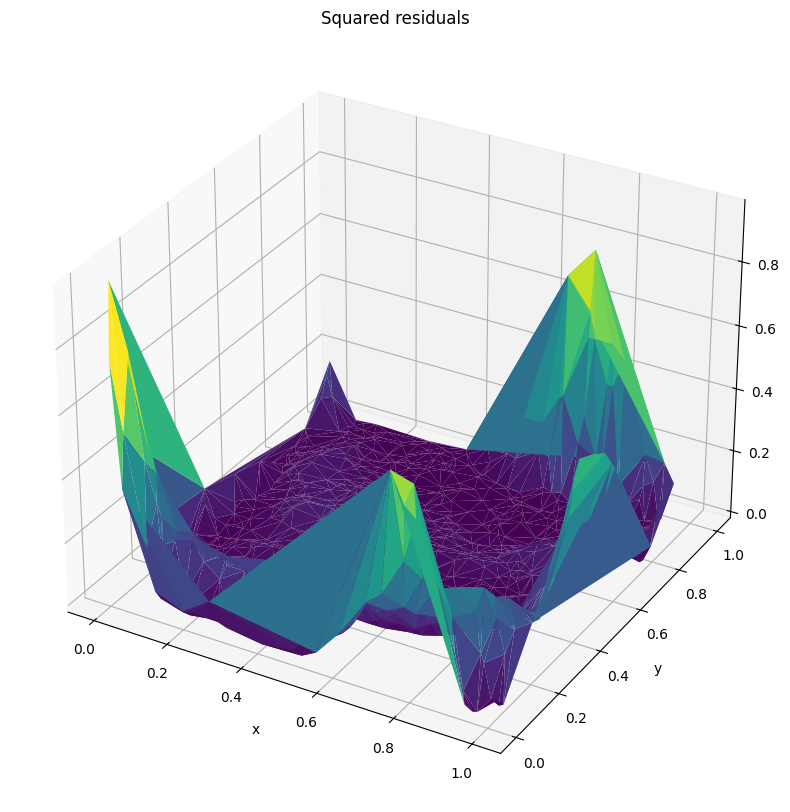

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': '3d'})

ax.plot_trisurf(x_test[:, 0], x_test[:, 1], (y_pred-y_test)**2, vmin=0, cmap=cm.viridis)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Squared residuals')
plt.show()
